In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('processed_javascript-algorithms_commit_data.csv')

In [3]:
# Đếm số lượng commit của mỗi tác giả
author_commit_counts = df['Author Name'].value_counts()

# Lấy 5 tác giả có số lượng commit cao nhất
top_contributors = author_commit_counts.head(5)

# In ra thông tin về 5 tác giả có số lượng commit cao nhất
print("Top 5 most active contributors:")
print(top_contributors)

Top 5 most active contributors:
Oleksii Trekhleb    826
Stulov Alex          11
m-maksyutin           9
Kevin Brewer          6
Albert Still          5
Name: Author Name, dtype: int64


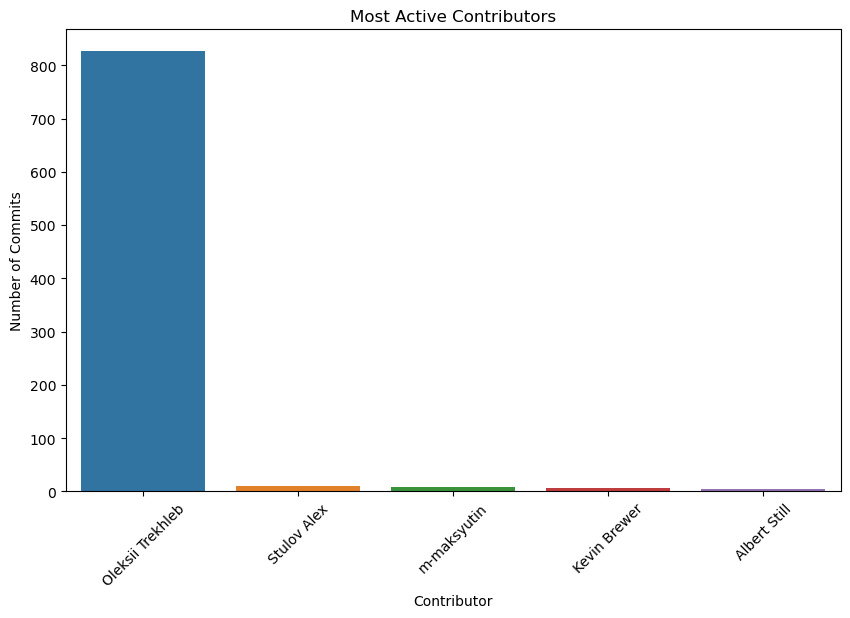

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_contributors.index, y=top_contributors.values)
plt.title('Most Active Contributors')
plt.xlabel('Contributor')
plt.ylabel('Number of Commits')
plt.xticks(rotation=45)
plt.show()

In [5]:
# Chuyển đổi cột 'Commit Date' thành kiểu dữ liệu datetime
df['Commit Date'] = pd.to_datetime(df['Commit Date'])

# Đếm tần suất commit theo tháng
commit_frequency = df['Commit Date'].dt.to_period('M').value_counts().sort_index()

# In kết quả
print("Commit frequency per month:")
print(commit_frequency)


Commit frequency per month:
2018-03     44
2018-04    190
2018-05    148
2018-06    104
2018-07     78
2018-08    102
2018-09     36
2018-10      9
2018-11      7
2018-12     27
2019-01      2
2019-02      3
2019-03     26
2019-04     12
2019-06      1
2019-12      1
2020-07     22
2020-08     11
2020-10      2
2020-11      4
2020-12     97
2021-01      7
2021-04      8
2021-05     10
2021-07      5
2021-10      6
2022-01     64
2022-02      2
2022-03      4
2022-07     11
2022-08     17
2022-09      2
2022-10      4
2022-11      5
2022-12      3
2023-01     14
2023-02      4
2023-03      3
2023-04      2
Freq: M, Name: Commit Date, dtype: int64


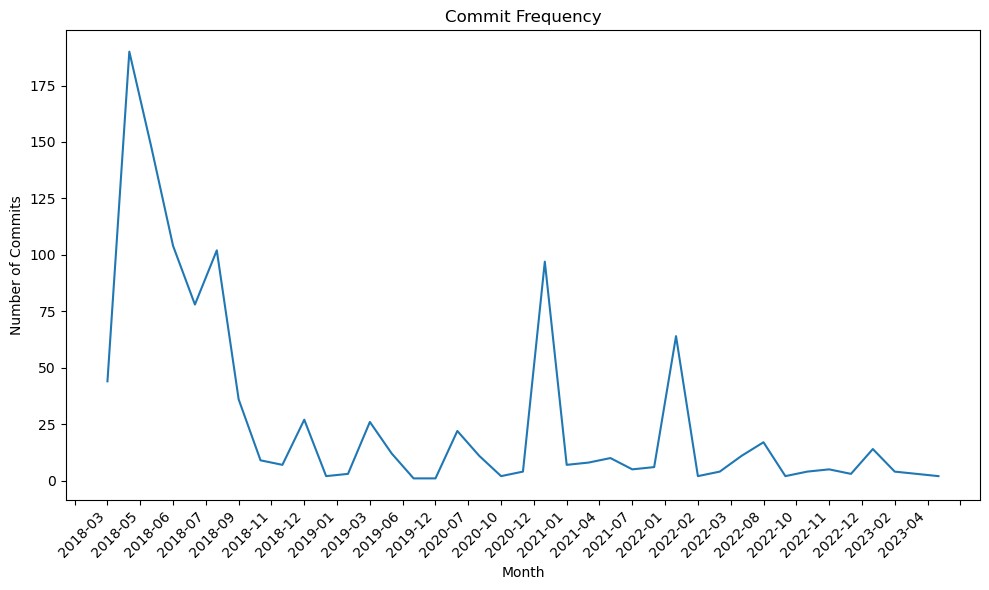

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=commit_frequency.index.astype(str), y=commit_frequency.values)
plt.title('Commit Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Commits')

plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(commit_frequency.index))) 

plt.tight_layout()
plt.show()

In [7]:
nltk.download('stopwords', quiet=True)

# Loại bỏ stop words
stop_words = set(stopwords.words('english'))
commit_messages = ' '.join(df['Commit Message'].tolist())
commit_words = [word.lower() for word in commit_messages.split() if word.lower() not in stop_words and word.isalpha()]

# Đếm tần suất xuất hiện của mỗi từ
word_counts = nltk.FreqDist(commit_words)

# Lấy 10 từ phổ biến nhất
common_words = word_counts.most_common(10)

# Tạo DataFrame từ list của các từ và tần suất tương ứng
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# In ra thông tin
print("\nTop 10 most common words in commit messages:")
print(common_words_df)


Top 10 most common words in commit messages:
          Word  Count
0          add    504
1       update    290
2          fix    149
3       readme     69
4  translation     68
5        added     61
6        merge     53
7       method     46
8         typo     45
9      oleksii     43


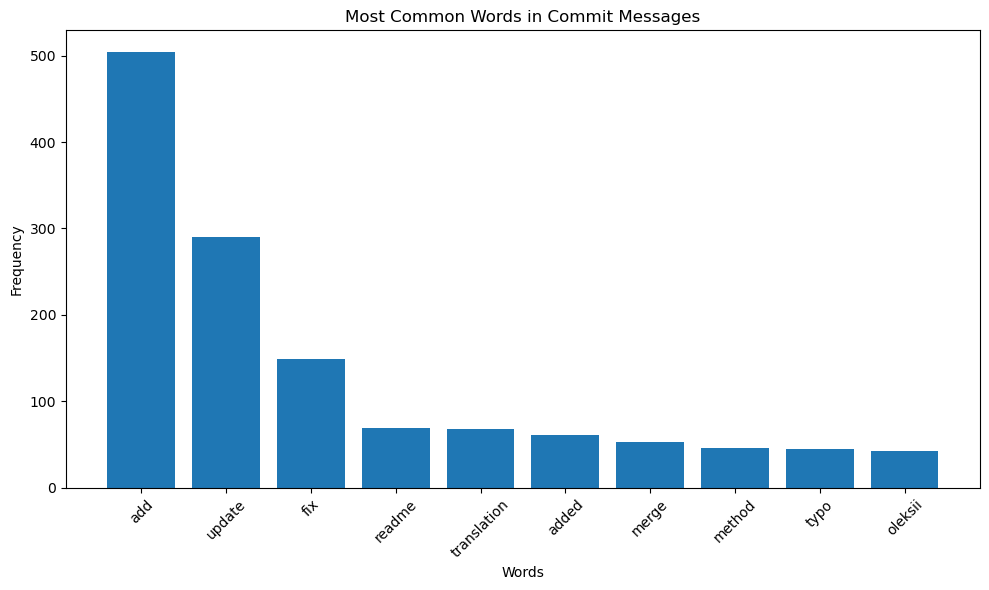

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(common_words_df['Word'], common_words_df['Count'])
plt.title('Most Common Words in Commit Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Đếm số lượng thay đổi cho mỗi tệp
frequently_changed_files = df['Files Changed'].value_counts().head(10)

# In ra top 10 tệp thay đổi nhiều nhất
print("\nTop 10 most frequently changed files:")
print(frequently_changed_files)



Top 10 most frequently changed files:
['README.md']                                                                                                 155
['README.zh-CN.md']                                                                                            15
['src/data-structures/linked-list/README.md']                                                                  13
['.travis.yml']                                                                                                13
['package-lock.json', 'package.json']                                                                          12
['src/algorithms/math/bits/README.md']                                                                          9
['src/data-structures/tree/BinaryTreeNode.js', 'src/data-structures/tree/__test__/BinaryTreeNode.test.js']      9
['BACKERS.md']                                                                                                  8
[]                                               

Top 10 Most Common File Types:
.md           1529
.js           1255
.json           71
.jpeg           35
.yml            27
.png            23
.jpg            19
.eslintrc        9
.                8
.gitignore       7
Name: File Type, dtype: int64


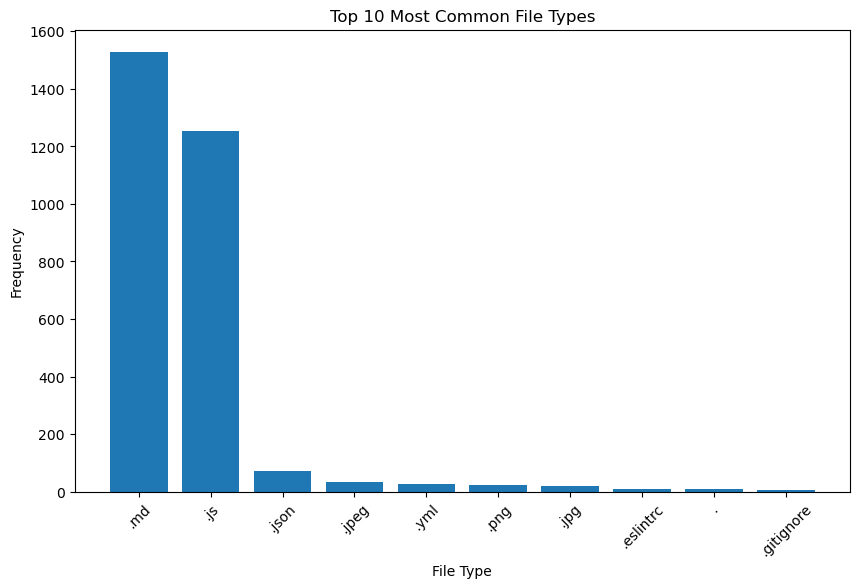

In [30]:
# Tách các giá trị trong mỗi ô thành các phần tử riêng biệt
file_types = df['File Type'].str.split(', ')

# Explode và tính toán tần suất xuất hiện
file_type_counts = file_types.explode().value_counts()

# Lấy 10 loại file phổ biến nhất
top_file_types = file_type_counts.head(10)

top_file_types = file_type_counts.head(10)
print("Top 10 Most Common File Types:")
print(top_file_types)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(top_file_types.index, top_file_types.values)
plt.xlabel('File Type')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common File Types')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Sắp xếp DataFrame theo cột 'Total Files Changed' giảm dần
sorted_df = df.sort_values('Total Files Changed', ascending=False)

# Lấy những commit có số lượng files thay đổi lớn nhất
top_commits = sorted_df.head(10) 

# In ra thông tin của các commit
for index, row in top_commits.iterrows():
    commit_index = index  # Chỉ số hàng của commit
    commit_message = row['Commit Message']
    total_files_changed = row['Total Files Changed']
    print(f"Commit Index: {commit_index}")
    print(f"Commit Message: {commit_message}")
    print(f"Total Files Changed: {total_files_changed}")
    print("------------------------------")


Commit Index: 808
Commit Message: Upgrade dependencies and fix ESLint issues.
Total Files Changed: 36
------------------------------
Commit Index: 785
Commit Message: Adds Portuguese (pt-BR) translation (#340)

* create portuguese translations

* renames `Lista Ligada` to `Lista Encadeada`

* revert changes on package-lock.json
Total Files Changed: 35
------------------------------
Commit Index: 1064
Commit Message: Brazilian Portuguese translation and typos fixes (#943)

* Update README.pt-BR.md

* TRIE README.pt-BR typo

* TREE README.pt-BR typo

* Stack README.pt-BR typo

* Priority Queue README.pt-BR typo

* hash-table README.pt-BR typo

* doubly-linked-list README.pt-BR typo

* disjoint-set README.pt-BR typo

* bloom-filter README.pt-BR typo

* merge-sort pt-BR translation

* merge-sort README added pt-BR option

* insertion sort pt-BR translation

* insertion sort README added pt-br option

* heap-sort pt-BR translation

* heap-sort READMED added pt-BR option

* bubble sort pt-BR

Commit Count by Total Files Changed:
1     563
2     214
4      88
3      71
5      40
6      27
8      21
7      15
10     12
9      11
13      7
16      5
11      4
14      4
12      4
25      2
15      2
36      1
19      1
20      1
33      1
35      1
21      1
34      1
Name: Total Files Changed, dtype: int64


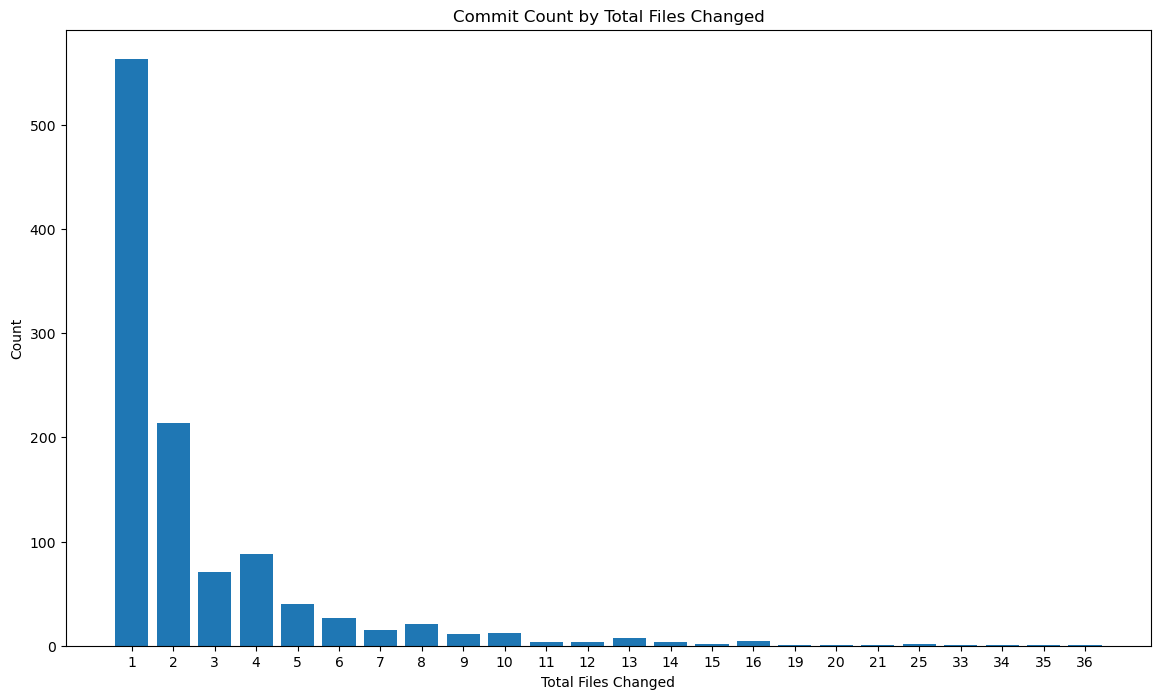

In [31]:
# Đếm số lượng các commit có cùng số lượng files changed
commit_counts = df['Total Files Changed'].value_counts()

# Lấy các giá trị số lượng files changed và tần suất tương ứng
x = commit_counts.index
y = commit_counts.values

# Sắp xếp các giá trị số lượng files changed theo thứ tự tăng dần
x_sorted = sorted(x)

print("Commit Count by Total Files Changed:")
print(commit_counts.head(5))

# Vẽ biểu đồ cột
plt.figure(figsize=(14, 8))
plt.bar(range(len(x_sorted)), y[x.argsort()])
plt.xlabel('Total Files Changed')
plt.ylabel('Count')
plt.title('Commit Count by Total Files Changed')
plt.xticks(range(len(x_sorted)), x_sorted, rotation=0)

plt.show()


Monday       140
Tuesday      174
Wednesday    145
Thursday     186
Friday       244
Saturday     128
Sunday        80
Name: Commit Date, dtype: int64


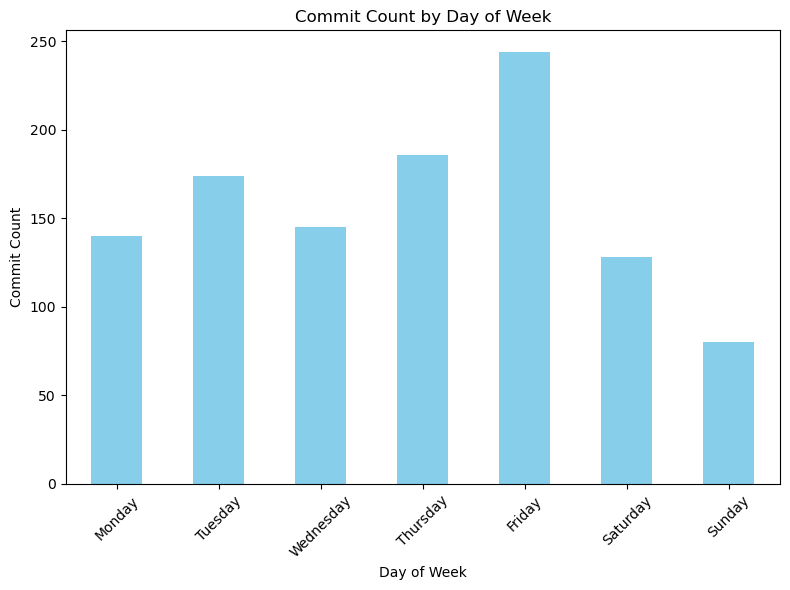

In [35]:
# Tính số lượng commit theo ngày trong tuần
commit_counts_day = df['Commit Date'].dt.day_name().value_counts()

# Sắp xếp theo thứ tự ngày trong tuần
commit_counts_day = commit_counts_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# In thông tin về thời điểm được commit nhiều nhất trong tuần
print(commit_counts_day)

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
commit_counts_day.plot(kind='bar', color='skyblue')
plt.title('Commit Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Commit Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Commit Count by Hour of Day:
0       2
1       2
2       4
3      43
4      90
5     115
6      89
7      67
8      54
9      59
10     27
11     41
12     70
13     54
14     91
15     55
16     34
17     41
18     46
19     67
20     32
21      7
22      7
Name: Commit Date, dtype: int64


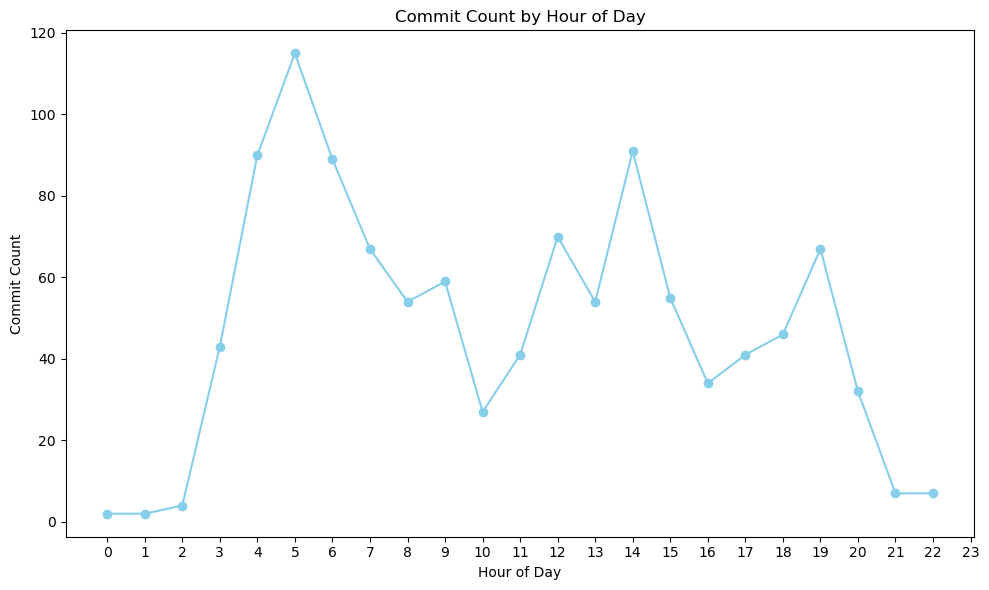

In [37]:
# Tính số lượng commit theo từng giờ trong ngày
commit_counts_by_hour = df['Commit Date'].dt.hour.value_counts().sort_index()

# In ra số lượng commit theo từng giờ trong ngày
print("Commit Count by Hour of Day:")
print(commit_counts_by_hour)

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
commit_counts_by_hour.plot(kind='line', marker='o', color='skyblue')
plt.title('Commit Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Commit Count')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

In [ ]:
# Tạo một cột mới 'Hour' để lưu giờ trong ngày từ cột 'Commit Date'
df['Hour'] = df['Commit Date'].dt.hour

# Tạo một cột mới 'Working Hour' để đánh dấu giờ làm việc và giờ ngoài giờ làm việc
df['Working Hour'] = df['Hour'].apply(lambda hour: 'Working Hour' if 9 <= hour <= 17 else 'Non-working Hour')

# Đếm số lượng commit theo tác giả và giờ làm việc
author_commit_hour_counts = df.groupby(['Author Name', 'Working Hour']).size().reset_index(name='Commit Count')

# Lọc ra các tác giả có số lượng commit vào giờ làm việc nhiều hơn vào giờ ngoài giờ làm việc
authors_more_working_hour = author_commit_hour_counts[author_commit_hour_counts['Working Hour'] == 'Working Hour']

# In danh sách các tác giả và số lượng commit vào giờ làm việc nhiều hơn vào giờ ngoài giờ làm việc
print("Authors with more commits during working hours than non-working hours:")
print(authors_more_working_hour)

Authors with more commits during working hours than non-working hours:
             Author Name  Working Hour  Commit Count
2     Abdessamad Bensaad  Working Hour             1
3    Adjie Djaka Permana  Working Hour             1
4      Agustin Navcevich  Working Hour             2
9              Amjad Ali  Working Hour             1
11           Anmol Gomra  Working Hour             1
..                   ...           ...           ...
208               vivaxy  Working Hour             1
209    vladimirschneider  Working Hour             2
210              yobrave  Working Hour             1
213                   儿时  Working Hour             1
215                   董凯  Working Hour             1

[90 rows x 3 columns]


Top 10 Authors with Most Commits during Working Hours:
Author Name
Oleksii Trekhleb        357
Stulov Alex               7
Kevin Brewer              4
Moshe                     4
m-maksyutin               4
Agustin Navcevich         2
Austin Theriot            2
Bruce-Feldman             2
David (Dato) Kadaria      2
Nicolas DUBIEN            2
Name: Commit Count, dtype: int64


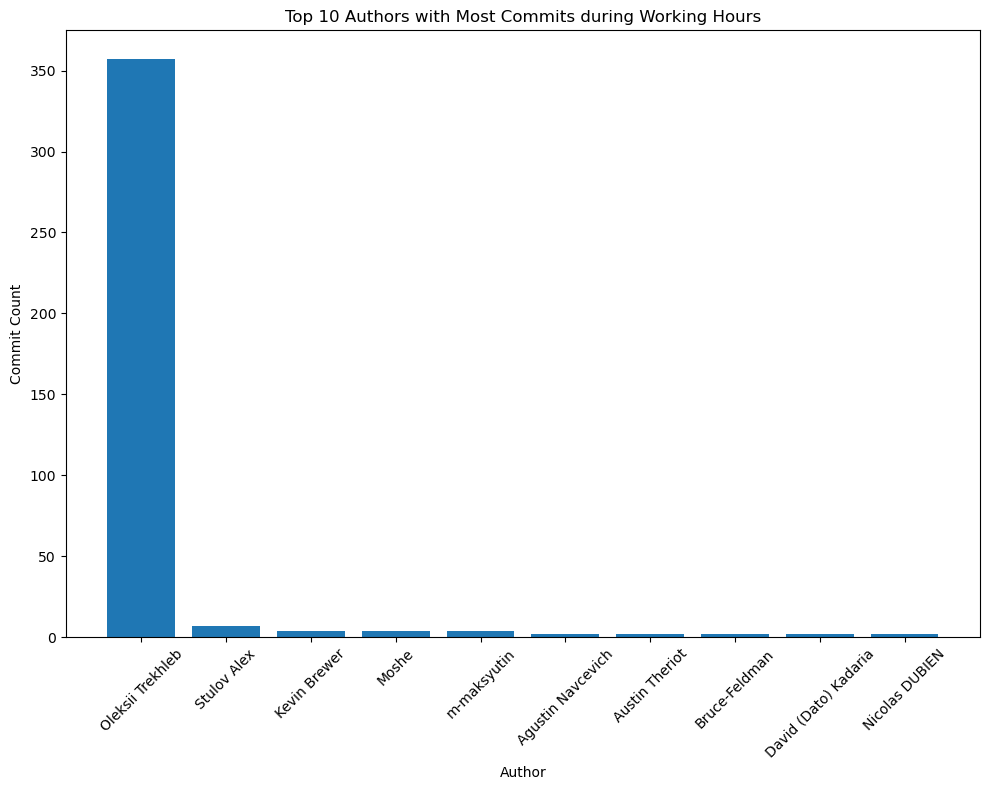

In [38]:
# Lấy 10 tác giả có số lượng commit vào giờ làm việc nhiều nhất
top_authors = authors_more_working_hour.groupby('Author Name')['Commit Count'].sum().nlargest(10)

print("Top 10 Authors with Most Commits during Working Hours:")
print(top_authors)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 8))
plt.bar(top_authors.index, top_authors.values)
plt.title('Top 10 Authors with Most Commits during Working Hours')
plt.xlabel('Author')
plt.ylabel('Commit Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

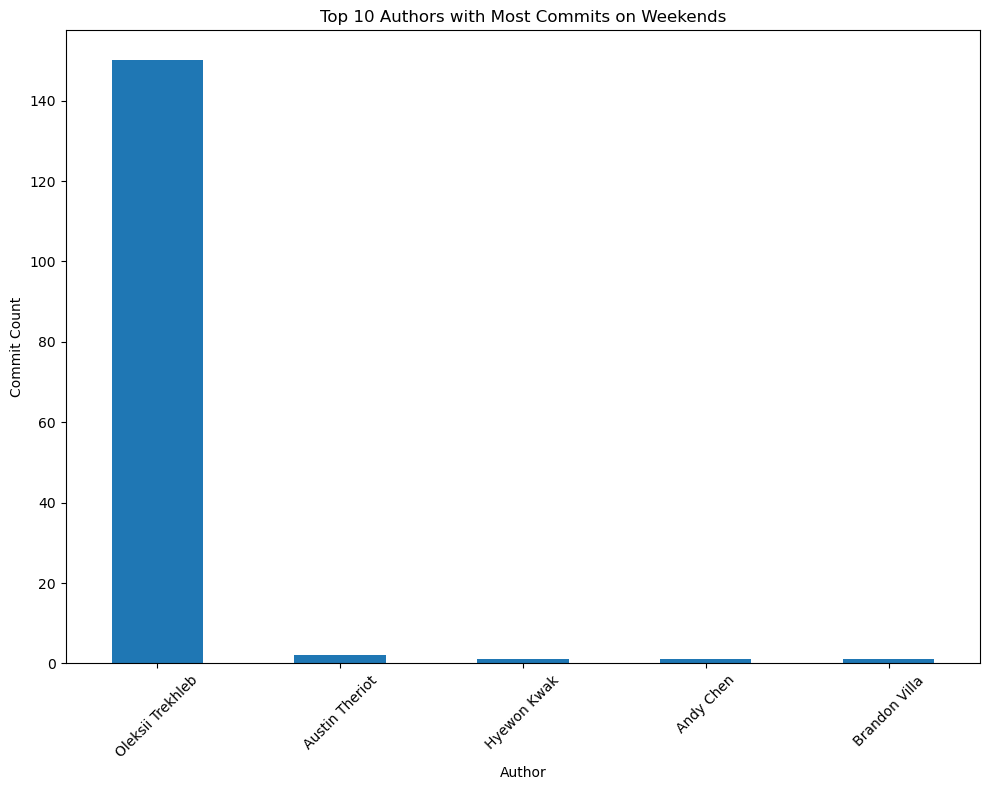

In [29]:

# Tạo cột mới 'Day of Week' lưu trữ thông tin về ngày trong tuần (0: Thứ 2, 1: Thứ 3, ..., 6: Chủ nhật)
df['Day of Week'] = df['Commit Date'].dt.dayofweek

# Tạo điều kiện để kiểm tra commit vào ngày cuối tuần (Thứ 6 hoặc Chủ nhật)
is_weekend = (df['Day of Week'] >= 5)

# Lọc ra các commit vào ngày cuối tuần
weekend_commits = df[is_weekend]

# Đếm số lượng commit của mỗi tác giả vào ngày cuối tuần
weekend_commit_counts = weekend_commits['Author Name'].value_counts()

# Lấy top 5 tác giả có số lượng commit vào ngày cuối tuần nhiều nhất
top_10_weekend_authors = weekend_commit_counts.head(5)

# Vẽ biểu đồ cột cho top 10 tác giả có số lượng commit vào ngày cuối tuần nhiều nhất
plt.figure(figsize=(10, 8))
top_10_weekend_authors.plot(kind='bar')
plt.title('Top 10 Authors with Most Commits on Weekends')
plt.xlabel('Author')
plt.ylabel('Commit Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
# Đếm số lượng commit theo tác giả và giờ làm việc
commit_counts = df.groupby(['Author Name', 'Working Hour']).size().reset_index(name='Commit Count')

# Tính tổng số lượng commit trong giờ làm việc và giờ ngoài giờ làm việc
total_working_hour = commit_counts[commit_counts['Working Hour'] == 'Working Hour']['Commit Count'].sum()
total_non_working_hour = commit_counts[commit_counts['Working Hour'] == 'Non-working Hour']['Commit Count'].sum()

# In tỉ lệ giữa lượng commit vào giờ làm việc và ngoài giờ làm việc
print("Commit Ratio: Working Hour vs Non-working Hour")
print("Working Hour: {:.2%}".format(total_working_hour / (total_working_hour + total_non_working_hour)))
print("Non-working Hour: {:.2%}".format(total_non_working_hour / (total_working_hour + total_non_working_hour)))

Commit Ratio: Working Hour vs Non-working Hour
Working Hour: 43.03%
Non-working Hour: 56.97%
